## PROJETO 2

<img src="diabetesimg.jpg"
     height="400">

## INTRODUÇÃO:

A diabetes é uma doença crônica caracterizada pelo aumento dos níveis de açúcar no sangue, o que pode provocar danos em vários órgãos, se não for tratado.

No mundo, os casos de diabetes em 2021 chegaram a 537 milhões de pessoas. No mesmo ano, 6,7 milhões de pessoas morreram em decorrência de complicações da doença, ou uma a cada cinco segundos. As projeções mostram que a situação tende a se agravar, com previsão de 643 milhões de casos até 2030, chegando em 2045 a 784 milhões.

Dentre esses 537 milhões de pessoas, aproximadamente 199 milhões são mulheres (37%), e só no Brasil são 8,5 milhões de brasileiras (7,8% da população).

Diante de tal problemática global, decidimos criar modelos que pudessem prever um diagnóstico, a partir de diversos fatores da paciente. 



Fontes: 

https://saude.estadao.com.br/noticias/geral,diabetes-doenca-silenciosa-avanca-em-todo-o-mundo-mas-pode-ser-prevenida-e-tratada,70004158121 |
https://www.tuasaude.com/diabetes/ |
https://mulheresediabetes.com.br/ 

## Base de dados e Dicionário das variáveis:

A base de dados foi extraída da plataforma [Kaggle](https://www.kaggle.com/datasets/whenamancodes/predict-diabities) intitulado “Predict Diabetes”, cujo objetivo principal é verificar se o paciente possui ou não diabtes baseado em alguns dados diagnósticos presentes no dataset.
Essa base de dados possui informação de 767 mulheres.

As variáveis apresentadas na base de dados `diabetes.xlsx` são:
 * `Pregnancies`: expressa o número de gravidez;
 * `Glucose`: expressa o nível de glicose no sangue;
 * `BloodPressure`: expressa a pressão sanguínea;
 * `SkinThickness`: expressa a espessura da pele;
 * `Insulin`: expressa o nível de Insulina no sangue;
 * `BMI`: expressa o índice de massa corporal;
 * `DiabetesPedigreeFunction`: expressa a porcentagem de Diabetes; e
 * `Age`: expressa idade;
 * `Outcome`: categozido em [1, 0], respectivamente sim e não.

In [16]:
# Importando as bibliotecas necessárias para esta atividade
import math

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from scipy import stats

from IPython.display import display

In [17]:
# Importando biblioteca para Sistema Operacional
import os

In [18]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
/Users/fabioneto/Desktop/Ciencia_dados/22-2b-cd-p2-p2_gustavo_fabio_vini_yuri



In [19]:
filename = 'diabetes.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename}')

Parece que o arquivo diabetes.xlsx está na mesma pasta do notebook, yay!


In [20]:
dados = pd.read_excel('diabetes.xlsx')
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Analise exploratória:

In [21]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
x=0
lista=[]
for i in dados['Insulin']:
    if i==0:
        lista.append(x)
        x+=1
    else:
        x+=1

dados.drop(lista,axis=0, inplace=True)

In [48]:
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


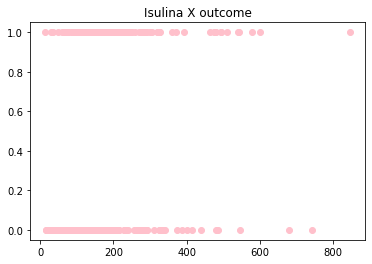

0.30345425200567644


In [50]:
Corr_isulina_Outcome = dados['Insulin'].corr(dados['Outcome'])
plt.title("Isulina X outcome")
plt.scatter(dados['Insulin'],dados['Outcome'], color= 'pink')
plt.show()
print(Corr_isulina_Outcome)


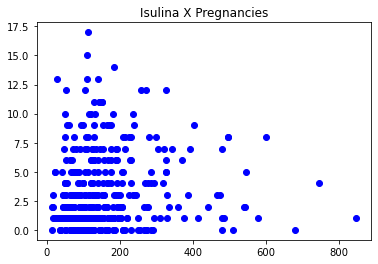

0.08217102573137143


In [51]:
Corr_isulina_Pregnancies = dados['Insulin'].corr(dados['Pregnancies'])
plt.title("Isulina X Pregnancies")
plt.scatter(dados['Insulin'],dados['Pregnancies'], color= 'blue')
plt.show()
print(Corr_isulina_Pregnancies)

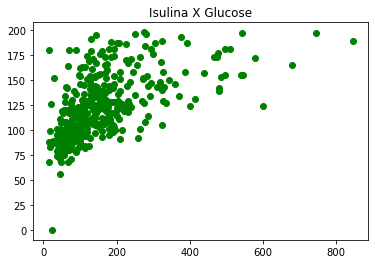

0.5800099317152833


In [52]:
Corr_isulina_Glucose = dados['Insulin'].corr(dados['Glucose'])
plt.title("Isulina X Glucose")
plt.scatter(dados['Insulin'],dados['Glucose'], color= 'green')
plt.show()
print(Corr_isulina_Glucose)

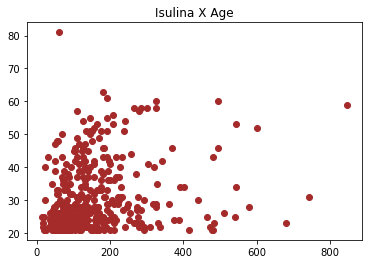

0.22026068477477093


In [53]:
Corr_isulina_Age = dados['Insulin'].corr(dados['Age'])
plt.title("Isulina X Age")
plt.scatter(dados['Insulin'],dados['Age'], color= 'brown')
plt.show()
print(Corr_isulina_Age)

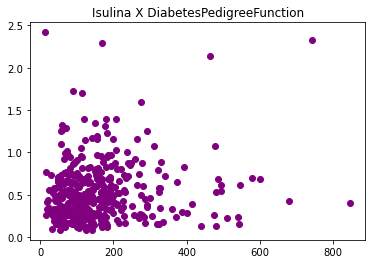

0.13039507167406195


In [54]:
Corr_isulina_DiabetesPedigreeFunction = dados['Insulin'].corr(dados['DiabetesPedigreeFunction'])
plt.title("Isulina X DiabetesPedigreeFunction")
plt.scatter(dados['Insulin'],dados['DiabetesPedigreeFunction'], color= 'purple')
plt.show()
print(Corr_isulina_DiabetesPedigreeFunction)

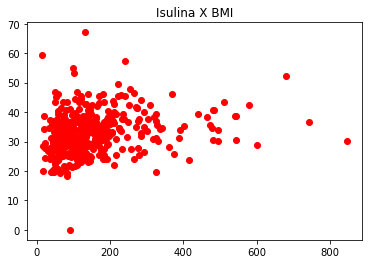

0.22832812557456036


In [55]:
Corr_isulina_BMI = dados['Insulin'].corr(dados['BMI'])
plt.title("Isulina X BMI")
plt.scatter(dados['Insulin'],dados['BMI'], color= 'red')
plt.show()
print(Corr_isulina_BMI)

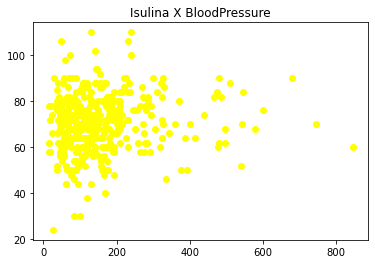

0.09827229945465546


In [56]:
Corr_isulina_BloodPressure= dados['Insulin'].corr(dados['BloodPressure'])
plt.title("Isulina X BloodPressure")
plt.scatter(dados['Insulin'],dados['BloodPressure'], color= 'yellow')
plt.show()
print(Corr_isulina_BloodPressure)

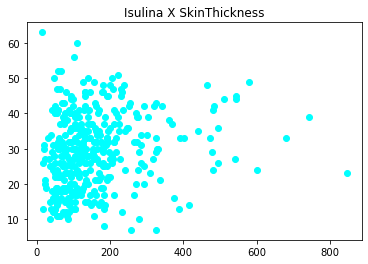

0.18488842018975898


In [57]:
Corr_isulina_SkinThickness= dados['Insulin'].corr(dados['SkinThickness'])
plt.title("Isulina X SkinThickness")
plt.scatter(dados['Insulin'],dados['SkinThickness'], color= 'cyan')
plt.show()
print(Corr_isulina_SkinThickness)

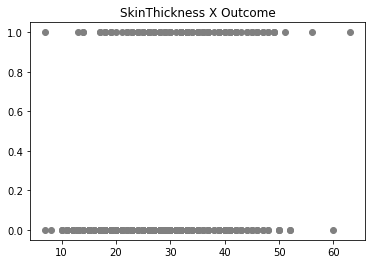

0.25785354653403475


In [59]:
Corr_outcome_SkinThickness= dados['Outcome'].corr(dados['SkinThickness'])
plt.title("SkinThickness X Outcome")
plt.scatter(dados['SkinThickness'],dados['Outcome'], color= 'grey')
plt.show()
print(Corr_outcome_SkinThickness)